<a href="https://colab.research.google.com/github/Tiffana/Data-Analysis-Project/blob/main/DataAnalysis_disney.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SCRAPING DATA

In [ ]:
!pip install google-play-scraper

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 3.3 MB/s eta 0:00:00


In [ ]:
from google_play_scraper import app

import pandas as pd

import numpy as np

In [ ]:
from google_play_scraper import Sort, reviews

result, continuation_token = reviews(
    'in.startv.hotstar.dplus',
    lang='id', # defaults to 'en'
    country='id', # defaults to 'us'
    sort=Sort.NEWEST, # defaults to Sort.MOST_RELEVANT you can use Sort.NEWEST to get newst reviews
    count=1000, # defaults to 100
    filter_score_with=None # defaults to None(means all score) Use 1 or 2 or 3 or 4 or 5 to select certain score
)

In [ ]:
df_busu = pd.DataFrame(np.array(result),columns=['review'])

df_busu = df_busu.join(pd.DataFrame(df_busu.pop('review').tolist()))

df_busu.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,8cc952c0-13dc-46db-aa54-c02e81e2b59d,Rizqi Gunawan,https://play-lh.googleusercontent.com/a/ACg8oc...,tiba tiba layar hitam Mulu aneh,3,0,None,2025-06-19 02:39:39,None,NaT,None
1,21b50cfc-7556-4538-9c35-48e9adcce8d2,Vicky hardiansah,https://play-lh.googleusercontent.com/a-/ALV-U...,"udah langganan, suara doang yg keluar, ga ada ...",1,0,25.06.02.1,2025-06-19 01:44:42,None,NaT,25.06.02.1
2,7b329c52-1619-45e2-854f-3201d5c7036a,Claud Mendung,https://play-lh.googleusercontent.com/a/ACg8oc...,Menurutku oke banget karena pilihan film nya l...,5,0,25.06.02.1,2025-06-18 22:21:57,None,NaT,25.06.02.1
3,a8bbb01c-6c44-4229-b72f-9840f93125e7,Ismail Cell,https://play-lh.googleusercontent.com/a/ACg8oc...,males saya untok nonton video kartun suruh bay...,1,0,25.06.02.1,2025-06-18 16:53:53,None,NaT,25.06.02.1
4,3635b4a7-bcfe-4644-92a5-fa5f737ae1b6,Mulki Only,https://play-lh.googleusercontent.com/a-/ALV-U...,di hp infinix zero 30 ga muncul gambarnya hany...,1,0,25.06.02.1,2025-06-18 14:16:34,None,NaT,25.06.02.1


In [ ]:
len(df_busu.index) #count the number of data we got

1000

In [ ]:
df_busu[['userName', 'score','at', 'content']].head()  #preview userName, rating, date-time, and reviews only

,userName,score,at,content
0,Rizqi Gunawan,3,2025-06-19 02:39:39,tiba tiba layar hitam Mulu aneh
1,Vicky hardiansah,1,2025-06-19 01:44:42,"udah langganan, suara doang yg keluar, ga ada ..."
2,Claud Mendung,5,2025-06-18 22:21:57,Menurutku oke banget karena pilihan film nya l...
3,Ismail Cell,1,2025-06-18 16:53:53,males saya untok nonton video kartun suruh bay...
4,Mulki Only,1,2025-06-18 14:16:34,di hp infinix zero 30 ga muncul gambarnya hany...


In [ ]:
new_df = df_busu[['userName', 'score','at', 'content']]
sorted_df = new_df.sort_values(by='at', ascending=False) #Sort by Newst, change to True if you want to sort by Oldest.
sorted_df.head()

,userName,score,at,content
0,Rizqi Gunawan,3,2025-06-19 02:39:39,tiba tiba layar hitam Mulu aneh
1,Vicky hardiansah,1,2025-06-19 01:44:42,"udah langganan, suara doang yg keluar, ga ada ..."
2,Claud Mendung,5,2025-06-18 22:21:57,Menurutku oke banget karena pilihan film nya l...
3,Ismail Cell,1,2025-06-18 16:53:53,males saya untok nonton video kartun suruh bay...
4,Mulki Only,1,2025-06-18 14:16:34,di hp infinix zero 30 ga muncul gambarnya hany...


In [ ]:
my_df = sorted_df[['userName', 'score','at', 'content']] #get userName, rating, date-time, and reviews only

In [ ]:
my_df.head()

,userName,score,at,content
0,Rizqi Gunawan,3,2025-06-19 02:39:39,tiba tiba layar hitam Mulu aneh
1,Vicky hardiansah,1,2025-06-19 01:44:42,"udah langganan, suara doang yg keluar, ga ada ..."
2,Claud Mendung,5,2025-06-18 22:21:57,Menurutku oke banget karena pilihan film nya l...
3,Ismail Cell,1,2025-06-18 16:53:53,males saya untok nonton video kartun suruh bay...
4,Mulki Only,1,2025-06-18 14:16:34,di hp infinix zero 30 ga muncul gambarnya hany...


In [ ]:
my_df.to_csv("data_disney.csv", index = False)

# PREPOCESSING DATA

In [ ]:
import pandas as pd
data = pd.read_csv('data_disney.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   userName  1000 non-null   object
 1   score     1000 non-null   int64 
 2   at        1000 non-null   object
 3   content   1000 non-null   object
dtypes: int64(1), object(3)
memory usage: 31.4+ KB


In [ ]:
data.head(2)

,userName,score,at,content
0,Rizqi Gunawan,3,2025-06-19 02:39:39,tiba tiba layar hitam Mulu aneh
1,Vicky hardiansah,1,2025-06-19 01:44:42,"udah langganan, suara doang yg keluar, ga ada ..."


In [ ]:
df = pd.DataFrame(data[['userName','score','at', 'content']])
df.head(5)

,userName,score,at,content
0,Rizqi Gunawan,3,2025-06-19 02:39:39,tiba tiba layar hitam Mulu aneh
1,Vicky hardiansah,1,2025-06-19 01:44:42,"udah langganan, suara doang yg keluar, ga ada ..."
2,Claud Mendung,5,2025-06-18 22:21:57,Menurutku oke banget karena pilihan film nya l...
3,Ismail Cell,1,2025-06-18 16:53:53,males saya untok nonton video kartun suruh bay...
4,Mulki Only,1,2025-06-18 14:16:34,di hp infinix zero 30 ga muncul gambarnya hany...


PROSES HAPUS DATA DUPLIKAT

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   userName  1000 non-null   object
 1   score     1000 non-null   int64 
 2   at        1000 non-null   object
 3   content   1000 non-null   object
dtypes: int64(1), object(3)
memory usage: 31.4+ KB


In [ ]:
df.drop_duplicates(subset = "content", keep = 'first', inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 981 entries, 0 to 999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   userName  981 non-null    object
 1   score     981 non-null    int64 
 2   at        981 non-null    object
 3   content   981 non-null    object
dtypes: int64(1), object(3)
memory usage: 38.3+ KB


In [ ]:
df.head(10)

,userName,score,at,content
0,Rizqi Gunawan,3,2025-06-19 02:39:39,tiba tiba layar hitam Mulu aneh
1,Vicky hardiansah,1,2025-06-19 01:44:42,"udah langganan, suara doang yg keluar, ga ada ..."
2,Claud Mendung,5,2025-06-18 22:21:57,Menurutku oke banget karena pilihan film nya l...
3,Ismail Cell,1,2025-06-18 16:53:53,males saya untok nonton video kartun suruh bay...
4,Mulki Only,1,2025-06-18 14:16:34,di hp infinix zero 30 ga muncul gambarnya hany...
5,Yuli Anti,1,2025-06-18 11:12:55,gimana ni min udah bayar langganan satu tahun ...
6,Alfar,1,2025-06-18 09:36:18,film jelek semua sekarang
7,Paijo ahmad,5,2025-06-18 09:13:58,sangat bagus
8,Intan Nagari,2,2025-06-18 06:27:29,gue orangnya cukup ga peduli sama aplikasi wlw...
9,Maulana Chandra,2,2025-06-18 04:27:39,alat pembayaran masih kurang banyak


WORDCLOUD SEBELUM PREPROCESSING

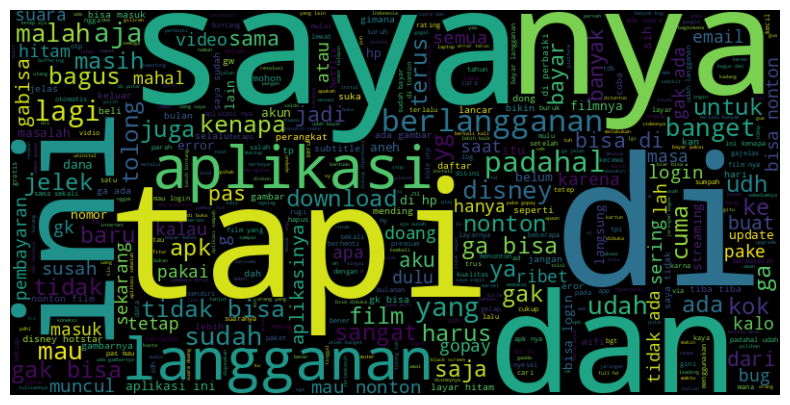

In [ ]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

#mengisi nilai dengan NaN dengan string kosong('')
df['content'] = df['content'].fillna('')

#menggabungkan teks dari kolom 'content'
text = ' '.join(df['content'].astype(str).tolist())

stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp'])

wc = WordCloud(stopwords=stopwords, background_color='black', max_words=500, width=800, height=400)
wc.generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

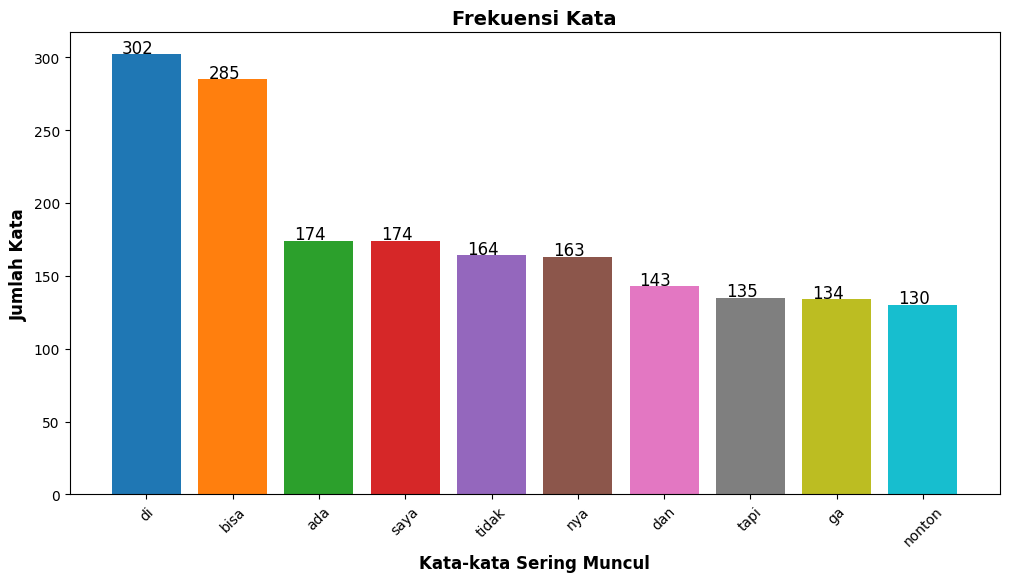

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

text = " ".join(df["content"])
tokens = text.split()
word_counts = Counter(tokens)
top_words = word_counts.most_common(10)
word, count = zip(*top_words)

#definisikan palet warna
colors = plt.cm.tab10(range(len(word)))

plt.figure(figsize=(12,6))
bars = plt.bar(word, count, color=colors)
plt.xlabel("Kata-kata Sering Muncul", fontsize=12, fontweight='bold')
plt.ylabel("Jumlah Kata", fontsize=12, fontweight='bold')
plt.title("Frekuensi Kata", fontsize=14, fontweight='bold')
plt.xticks(rotation=45)

#menambahkan angka rata tengah di atas setiap bar
for bar, num in zip(bars, count):
  plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, num + 1, str(num), ha='center', color= 'black' , fontsize=12)
plt.show()

PROSES CLEANING

In [ ]:
import re
import string
import nltk

# fungsi untuk menghapus emoji
def remove_emoji(tweet):
    if tweet is not None and isinstance(tweet, str):
        emoji_pattern = re.compile("["
            u"\U0001F600-\U0001F64F"  # emoticons
            u"\U0001F300-\U0001F5FF"  # symbol & pictographs
            u"\U0001F680-\U0001F6FF"  # transport & map symbols
            u"\U0001F700-\U0001F77F"  # alchemical symbols
            u"\U0001F780-\U0001F97F"  # geometric shapes extended
            u"\U0001F800-\U0001F8FF"   # supplemental arrows-C
            u"\U0001F900-\U0001F9FF"   # supplemental symbols and pictographs
            u"\U0001FA00-\U0001FA6F"   # chess symbols
            u"\U0001FA70-\U0001FAFF"  # symbols and pictographs extended-A
            u"\U0001F004-\U0001F0CF"   # additional emoticons
            u"\U0001F1E0-\U0001F1FF"  # flags
        "]+", flags=re.UNICODE)
        return emoji_pattern.sub(r'', tweet)
    else:
        return tweet

# fungsi untuk menghapus simbol
def remove_symbols(tweet):
    if tweet is not None and isinstance(tweet, str):
        tweet = re.sub(r'[^a-zA-Z0-9\s]', '', tweet)
        return tweet

# fungsi untuk menghapus angka
def remove_numbers(tweet):
    if tweet is not None and isinstance(tweet, str):
        tweet = re.sub(r'\d', '', tweet)
        return tweet

df['cleaning'] = df['content'].apply(lambda x: remove_emoji(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_symbols(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_numbers(x))

df.head(15)


,userName,score,at,content,cleaning
0,Rizqi Gunawan,3,2025-06-19 02:39:39,tiba tiba layar hitam Mulu aneh,tiba tiba layar hitam Mulu aneh
1,Vicky hardiansah,1,2025-06-19 01:44:42,"udah langganan, suara doang yg keluar, ga ada ...",udah langganan suara doang yg keluar ga ada ga...
2,Claud Mendung,5,2025-06-18 22:21:57,Menurutku oke banget karena pilihan film nya l...,Menurutku oke banget karena pilihan film nya l...
3,Ismail Cell,1,2025-06-18 16:53:53,males saya untok nonton video kartun suruh bay...,males saya untok nonton video kartun suruh bay...
4,Mulki Only,1,2025-06-18 14:16:34,di hp infinix zero 30 ga muncul gambarnya hany...,di hp infinix zero ga muncul gambarnya hanya ...
5,Yuli Anti,1,2025-06-18 11:12:55,gimana ni min udah bayar langganan satu tahun ...,gimana ni min udah bayar langganan satu tahun ...
6,Alfar,1,2025-06-18 09:36:18,film jelek semua sekarang,film jelek semua sekarang
7,Paijo ahmad,5,2025-06-18 09:13:58,sangat bagus,sangat bagus
8,Intan Nagari,2,2025-06-18 06:27:29,gue orangnya cukup ga peduli sama aplikasi wlw...,gue orangnya cukup ga peduli sama aplikasi wlw...
9,Maulana Chandra,2,2025-06-18 04:27:39,alat pembayaran masih kurang banyak,alat pembayaran masih kurang banyak


PROSES CASE FOLDING

In [ ]:
def case_folding(text):
    if isinstance(text, str):
      lowercase_text = text.lower()
      return lowercase_text
    else:
        return text


df['case_folding'] = df['cleaning'].apply(case_folding)
df.head(5)

,userName,score,at,content,cleaning,case_folding
0,Rizqi Gunawan,3,2025-06-19 02:39:39,tiba tiba layar hitam Mulu aneh,tiba tiba layar hitam Mulu aneh,tiba tiba layar hitam mulu aneh
1,Vicky hardiansah,1,2025-06-19 01:44:42,"udah langganan, suara doang yg keluar, ga ada ...",udah langganan suara doang yg keluar ga ada ga...,udah langganan suara doang yg keluar ga ada ga...
2,Claud Mendung,5,2025-06-18 22:21:57,Menurutku oke banget karena pilihan film nya l...,Menurutku oke banget karena pilihan film nya l...,menurutku oke banget karena pilihan film nya l...
3,Ismail Cell,1,2025-06-18 16:53:53,males saya untok nonton video kartun suruh bay...,males saya untok nonton video kartun suruh bay...,males saya untok nonton video kartun suruh bay...
4,Mulki Only,1,2025-06-18 14:16:34,di hp infinix zero 30 ga muncul gambarnya hany...,di hp infinix zero ga muncul gambarnya hanya ...,di hp infinix zero ga muncul gambarnya hanya ...


NORMALISASI KATA

In [ ]:
import pandas as pd

#fungsi penggantian kata tidak baku
def replace_taboo_words(text, kamus_tidak_baku):
    if isinstance(text, str):
        words = text.split()
        replaced_words = []
        kalimat_baku = []
        kata_diganti = []
        kata_tidak_baku_hash = []

        for word in words:
            if word in kamus_tidak_baku:
                baku_word = kamus_tidak_baku[word]
                if isinstance(baku_word, str) and all(char.isalpha() for char in baku_word):
                    replaced_words.append(baku_word)
                    kalimat_baku.append(baku_word)
                    kata_diganti.append(word)
                    kata_tidak_baku_hash.append(hash(word))
                else:
                    replaced_words.append(word)  # atau '<karakter eksplisit>'
            else:
                replaced_words.append(word)

        replaced_text = ' '.join(replaced_words)
        return replaced_text, kalimat_baku, kata_diganti, kata_tidak_baku_hash
    else:
        return '', [], [], []

In [ ]:
kamus = {'gk': 'tidak', 'bgt': 'banget'}
replace_taboo_words("gk ngerti bgt lah", kamus)

('tidak ngerti banget lah',
 ['tidak', 'banget'],
 ['gk', 'bgt'],
 [127756114187120301, 2184090384505725600])

**download kamuskatabaku.xlsx dari Mydrive/Colab Notebooks**[link text](https://docs.google.com/spreadsheets/d/1W8ajWI6w1AeijXTUA-Jni8HwlFXOv0yo/edit?usp=sharing&ouid=102220997434099629685&rtpof=true&sd=true)

In [ ]:
kamus_data = pd.read_excel("kamuskatabaku.xlsx")
kamus_tidak_baku = dict(zip(kamus_data['tidak_baku'], kamus_data['kata_baku']))

In [ ]:
#baca dataset
data = pd.DataFrame(df[['userName','score','at', 'content','cleaning','case_folding']])
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
Index: 981 entries, 0 to 999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   userName      981 non-null    object
 1   score         981 non-null    int64 
 2   at            981 non-null    object
 3   content       981 non-null    object
 4   cleaning      981 non-null    object
 5   case_folding  981 non-null    object
dtypes: int64(1), object(5)
memory usage: 85.9+ KB


,userName,score,at,content,cleaning,case_folding
0,Rizqi Gunawan,3,2025-06-19 02:39:39,tiba tiba layar hitam Mulu aneh,tiba tiba layar hitam Mulu aneh,tiba tiba layar hitam mulu aneh
1,Vicky hardiansah,1,2025-06-19 01:44:42,"udah langganan, suara doang yg keluar, ga ada ...",udah langganan suara doang yg keluar ga ada ga...,udah langganan suara doang yg keluar ga ada ga...
2,Claud Mendung,5,2025-06-18 22:21:57,Menurutku oke banget karena pilihan film nya l...,Menurutku oke banget karena pilihan film nya l...,menurutku oke banget karena pilihan film nya l...
3,Ismail Cell,1,2025-06-18 16:53:53,males saya untok nonton video kartun suruh bay...,males saya untok nonton video kartun suruh bay...,males saya untok nonton video kartun suruh bay...
4,Mulki Only,1,2025-06-18 14:16:34,di hp infinix zero 30 ga muncul gambarnya hany...,di hp infinix zero ga muncul gambarnya hanya ...,di hp infinix zero ga muncul gambarnya hanya ...


In [ ]:
data['normalisasi'], data['Kata_Baku'], data['Kata_Tidak_Baku'], data['Kata_Tidak_Baku_Hash'] = zip(*data['case_folding'].apply(lambda text: replace_taboo_words(text, kamus_tidak_baku)))

df = pd.DataFrame(data[['userName','score','at','content','cleaning','case_folding','normalisasi']])
df.head(20)


,userName,score,at,content,cleaning,case_folding,normalisasi
0,Rizqi Gunawan,3,2025-06-19 02:39:39,tiba tiba layar hitam Mulu aneh,tiba tiba layar hitam Mulu aneh,tiba tiba layar hitam mulu aneh,tiba tiba layar hitam mulu aneh
1,Vicky hardiansah,1,2025-06-19 01:44:42,"udah langganan, suara doang yg keluar, ga ada ...",udah langganan suara doang yg keluar ga ada ga...,udah langganan suara doang yg keluar ga ada ga...,sudah langganan suara doang yang keluar tidak ...
2,Claud Mendung,5,2025-06-18 22:21:57,Menurutku oke banget karena pilihan film nya l...,Menurutku oke banget karena pilihan film nya l...,menurutku oke banget karena pilihan film nya l...,menurutku oke banget karena pilihan film ya le...
3,Ismail Cell,1,2025-06-18 16:53:53,males saya untok nonton video kartun suruh bay...,males saya untok nonton video kartun suruh bay...,males saya untok nonton video kartun suruh bay...,malas saya untok menonton video kartun suruh b...
4,Mulki Only,1,2025-06-18 14:16:34,di hp infinix zero 30 ga muncul gambarnya hany...,di hp infinix zero ga muncul gambarnya hanya ...,di hp infinix zero ga muncul gambarnya hanya ...,di hp infinix zero tidak muncul gambarnya hany...
5,Yuli Anti,1,2025-06-18 11:12:55,gimana ni min udah bayar langganan satu tahun ...,gimana ni min udah bayar langganan satu tahun ...,gimana ni min udah bayar langganan satu tahun ...,bagaimana nih min sudah bayar langganan satu t...
6,Alfar,1,2025-06-18 09:36:18,film jelek semua sekarang,film jelek semua sekarang,film jelek semua sekarang,film jelek semua sekarang
7,Paijo ahmad,5,2025-06-18 09:13:58,sangat bagus,sangat bagus,sangat bagus,sangat bagus
8,Intan Nagari,2,2025-06-18 06:27:29,gue orangnya cukup ga peduli sama aplikasi wlw...,gue orangnya cukup ga peduli sama aplikasi wlw...,gue orangnya cukup ga peduli sama aplikasi wlw...,gue orangnya cukup tidak peduli sama aplikasi ...
9,Maulana Chandra,2,2025-06-18 04:27:39,alat pembayaran masih kurang banyak,alat pembayaran masih kurang banyak,alat pembayaran masih kurang banyak,alat pembayaran masih kurang banyak


TOKENIZATION

In [ ]:
def tokenize(text):
  tokens = text.split()
  return tokens

df['tokenize'] = df['normalisasi'].apply(tokenize)
df.head(5)

,userName,score,at,content,cleaning,case_folding,normalisasi,tokenize
0,Rizqi Gunawan,3,2025-06-19 02:39:39,tiba tiba layar hitam Mulu aneh,tiba tiba layar hitam Mulu aneh,tiba tiba layar hitam mulu aneh,tiba tiba layar hitam mulu aneh,"[tiba, tiba, layar, hitam, mulu, aneh]"
1,Vicky hardiansah,1,2025-06-19 01:44:42,"udah langganan, suara doang yg keluar, ga ada ...",udah langganan suara doang yg keluar ga ada ga...,udah langganan suara doang yg keluar ga ada ga...,sudah langganan suara doang yang keluar tidak ...,"[sudah, langganan, suara, doang, yang, keluar,..."
2,Claud Mendung,5,2025-06-18 22:21:57,Menurutku oke banget karena pilihan film nya l...,Menurutku oke banget karena pilihan film nya l...,menurutku oke banget karena pilihan film nya l...,menurutku oke banget karena pilihan film ya le...,"[menurutku, oke, banget, karena, pilihan, film..."
3,Ismail Cell,1,2025-06-18 16:53:53,males saya untok nonton video kartun suruh bay...,males saya untok nonton video kartun suruh bay...,males saya untok nonton video kartun suruh bay...,malas saya untok menonton video kartun suruh b...,"[malas, saya, untok, menonton, video, kartun, ..."
4,Mulki Only,1,2025-06-18 14:16:34,di hp infinix zero 30 ga muncul gambarnya hany...,di hp infinix zero ga muncul gambarnya hanya ...,di hp infinix zero ga muncul gambarnya hanya ...,di hp infinix zero tidak muncul gambarnya hany...,"[di, hp, infinix, zero, tidak, muncul, gambarn..."


PROSES STOPWORD REMOVAL

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('indonesian')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def remove_stopwords(text):
  return [word for word in text if word not in stop_words]

df['stopword removal'] = df['tokenize'].apply(lambda x : remove_stopwords(x))
df.head(5)

,userName,score,at,content,cleaning,case_folding,normalisasi,tokenize,stopword removal
0,Rizqi Gunawan,3,2025-06-19 02:39:39,tiba tiba layar hitam Mulu aneh,tiba tiba layar hitam Mulu aneh,tiba tiba layar hitam mulu aneh,tiba tiba layar hitam mulu aneh,"[tiba, tiba, layar, hitam, mulu, aneh]","[layar, hitam, mulu, aneh]"
1,Vicky hardiansah,1,2025-06-19 01:44:42,"udah langganan, suara doang yg keluar, ga ada ...",udah langganan suara doang yg keluar ga ada ga...,udah langganan suara doang yg keluar ga ada ga...,sudah langganan suara doang yang keluar tidak ...,"[sudah, langganan, suara, doang, yang, keluar,...","[langganan, suara, doang, gambarnya, payah, ba..."
2,Claud Mendung,5,2025-06-18 22:21:57,Menurutku oke banget karena pilihan film nya l...,Menurutku oke banget karena pilihan film nya l...,menurutku oke banget karena pilihan film nya l...,menurutku oke banget karena pilihan film ya le...,"[menurutku, oke, banget, karena, pilihan, film...","[menurutku, oke, banget, pilihan, film, ya, va..."
3,Ismail Cell,1,2025-06-18 16:53:53,males saya untok nonton video kartun suruh bay...,males saya untok nonton video kartun suruh bay...,males saya untok nonton video kartun suruh bay...,malas saya untok menonton video kartun suruh b...,"[malas, saya, untok, menonton, video, kartun, ...","[malas, untok, menonton, video, kartun, suruh,..."
4,Mulki Only,1,2025-06-18 14:16:34,di hp infinix zero 30 ga muncul gambarnya hany...,di hp infinix zero ga muncul gambarnya hanya ...,di hp infinix zero ga muncul gambarnya hanya ...,di hp infinix zero tidak muncul gambarnya hany...,"[di, hp, infinix, zero, tidak, muncul, gambarn...","[hp, infinix, zero, muncul, gambarnya, suara, ..."


PROSES STEMING DATA

In [ ]:
!pip install Sastrawi

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.5 MB/s eta 0:00:00


In [ ]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stem_text (text):
  return [stemmer.stem(word) for word in text]

df['steming_data'] = df['stopword removal'].apply(lambda x: ' '.join(stem_text(x)))
df.head(5)

,userName,score,at,content,cleaning,case_folding,normalisasi,tokenize,stopword removal,steming_data
0,Rizqi Gunawan,3,2025-06-19 02:39:39,tiba tiba layar hitam Mulu aneh,tiba tiba layar hitam Mulu aneh,tiba tiba layar hitam mulu aneh,tiba tiba layar hitam mulu aneh,"[tiba, tiba, layar, hitam, mulu, aneh]","[layar, hitam, mulu, aneh]",layar hitam mulu aneh
1,Vicky hardiansah,1,2025-06-19 01:44:42,"udah langganan, suara doang yg keluar, ga ada ...",udah langganan suara doang yg keluar ga ada ga...,udah langganan suara doang yg keluar ga ada ga...,sudah langganan suara doang yang keluar tidak ...,"[sudah, langganan, suara, doang, yang, keluar,...","[langganan, suara, doang, gambarnya, payah, ba...",langgan suara doang gambar payah banget nama m...
2,Claud Mendung,5,2025-06-18 22:21:57,Menurutku oke banget karena pilihan film nya l...,Menurutku oke banget karena pilihan film nya l...,menurutku oke banget karena pilihan film nya l...,menurutku oke banget karena pilihan film ya le...,"[menurutku, oke, banget, karena, pilihan, film...","[menurutku, oke, banget, pilihan, film, ya, va...",turut oke banget pilih film ya variatif series...
3,Ismail Cell,1,2025-06-18 16:53:53,males saya untok nonton video kartun suruh bay...,males saya untok nonton video kartun suruh bay...,males saya untok nonton video kartun suruh bay...,malas saya untok menonton video kartun suruh b...,"[malas, saya, untok, menonton, video, kartun, ...","[malas, untok, menonton, video, kartun, suruh,...",malas untok tonton video kartun suruh bayar ma...
4,Mulki Only,1,2025-06-18 14:16:34,di hp infinix zero 30 ga muncul gambarnya hany...,di hp infinix zero ga muncul gambarnya hanya ...,di hp infinix zero ga muncul gambarnya hanya ...,di hp infinix zero tidak muncul gambarnya hany...,"[di, hp, infinix, zero, tidak, muncul, gambarn...","[hp, infinix, zero, muncul, gambarnya, suara, ...",hp infinix zero muncul gambar suara perangkat ...


PROSES HAPUS DATA BERNILAI KOSONG (NAN)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 981 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   userName          981 non-null    object
 1   score             981 non-null    int64 
 2   at                981 non-null    object
 3   content           981 non-null    object
 4   cleaning          981 non-null    object
 5   case_folding      981 non-null    object
 6   normalisasi       981 non-null    object
 7   tokenize          981 non-null    object
 8   stopword removal  981 non-null    object
 9   steming_data      981 non-null    object
dtypes: int64(1), object(9)
memory usage: 116.6+ KB


In [ ]:
data = df.dropna()

In [ ]:
data.head()

,userName,score,at,content,cleaning,case_folding,normalisasi,tokenize,stopword removal,steming_data
0,Rizqi Gunawan,3,2025-06-19 02:39:39,tiba tiba layar hitam Mulu aneh,tiba tiba layar hitam Mulu aneh,tiba tiba layar hitam mulu aneh,tiba tiba layar hitam mulu aneh,"[tiba, tiba, layar, hitam, mulu, aneh]","[layar, hitam, mulu, aneh]",layar hitam mulu aneh
1,Vicky hardiansah,1,2025-06-19 01:44:42,"udah langganan, suara doang yg keluar, ga ada ...",udah langganan suara doang yg keluar ga ada ga...,udah langganan suara doang yg keluar ga ada ga...,sudah langganan suara doang yang keluar tidak ...,"[sudah, langganan, suara, doang, yang, keluar,...","[langganan, suara, doang, gambarnya, payah, ba...",langgan suara doang gambar payah banget nama m...
2,Claud Mendung,5,2025-06-18 22:21:57,Menurutku oke banget karena pilihan film nya l...,Menurutku oke banget karena pilihan film nya l...,menurutku oke banget karena pilihan film nya l...,menurutku oke banget karena pilihan film ya le...,"[menurutku, oke, banget, karena, pilihan, film...","[menurutku, oke, banget, pilihan, film, ya, va...",turut oke banget pilih film ya variatif series...
3,Ismail Cell,1,2025-06-18 16:53:53,males saya untok nonton video kartun suruh bay...,males saya untok nonton video kartun suruh bay...,males saya untok nonton video kartun suruh bay...,malas saya untok menonton video kartun suruh b...,"[malas, saya, untok, menonton, video, kartun, ...","[malas, untok, menonton, video, kartun, suruh,...",malas untok tonton video kartun suruh bayar ma...
4,Mulki Only,1,2025-06-18 14:16:34,di hp infinix zero 30 ga muncul gambarnya hany...,di hp infinix zero ga muncul gambarnya hanya ...,di hp infinix zero ga muncul gambarnya hanya ...,di hp infinix zero tidak muncul gambarnya hany...,"[di, hp, infinix, zero, tidak, muncul, gambarn...","[hp, infinix, zero, muncul, gambarnya, suara, ...",hp infinix zero muncul gambar suara perangkat ...


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 981 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   userName          981 non-null    object
 1   score             981 non-null    int64 
 2   at                981 non-null    object
 3   content           981 non-null    object
 4   cleaning          981 non-null    object
 5   case_folding      981 non-null    object
 6   normalisasi       981 non-null    object
 7   tokenize          981 non-null    object
 8   stopword removal  981 non-null    object
 9   steming_data      981 non-null    object
dtypes: int64(1), object(9)
memory usage: 116.6+ KB


WORDCLOUD SETELAH PREPROCESSING

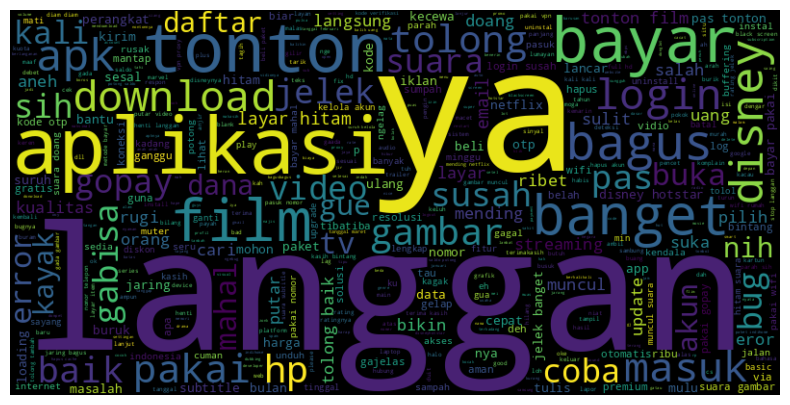

In [ ]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

#mengisi nilai NaN dengan string kosong ('')
#data['steming_data'] = data['steming_data'].fillna('')

#menggabungkan teks dari kolom 'content'
text = ' '.join(data['steming_data'].astype(str).tolist())

stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp'])

wc = WordCloud(stopwords=stopwords, background_color='black', max_words=500, width=800, height=400)
wc.generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

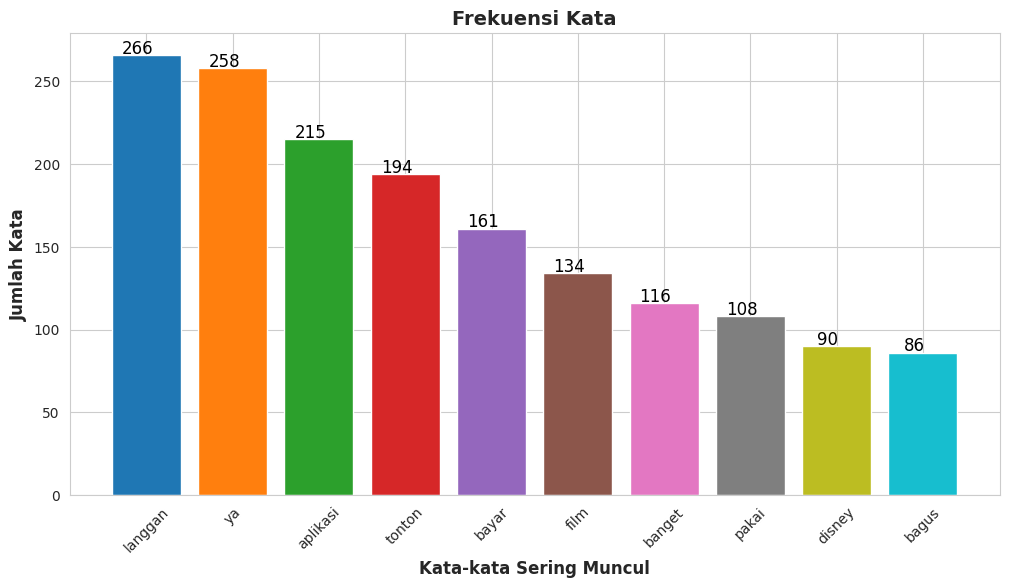

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

text = " ".join(data["steming_data"])
tokens = text.split()
word_counts = Counter(tokens)
top_words = word_counts.most_common(10)
word, count = zip(*top_words)

#definisikan palet warna
colors = plt.cm.tab10(range(len(word)))

plt.figure(figsize=(12,6))
bars = plt.bar(word, count, color=colors)
plt.xlabel("Kata-kata Sering Muncul", fontsize=12, fontweight='bold')
plt.ylabel("Jumlah Kata", fontsize=12, fontweight='bold')
plt.title("Frekuensi Kata", fontsize=14, fontweight='bold')
plt.xticks(rotation=45)

#menambahkan angka rata tengah di atas setiap bar
for bar, num in zip(bars, count):
  plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, num + 1, str(num), ha='center', color= 'black' , fontsize=12)
plt.show()

In [ ]:
data.to_csv('Hasil_Preprocessing_data_disney.csv',encoding='utf8', index=False);

# PELABELAN DATA

In [ ]:
import pandas as pd

data = pd.read_csv('Hasil_Preprocessing_data_disney.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   userName          981 non-null    object
 1   score             981 non-null    int64 
 2   at                981 non-null    object
 3   content           981 non-null    object
 4   cleaning          972 non-null    object
 5   case_folding      972 non-null    object
 6   normalisasi       970 non-null    object
 7   tokenize          981 non-null    object
 8   stopword removal  981 non-null    object
 9   steming_data      965 non-null    object
dtypes: int64(1), object(9)
memory usage: 76.8+ KB


In [ ]:
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 965 entries, 0 to 980
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   userName          965 non-null    object
 1   score             965 non-null    int64 
 2   at                965 non-null    object
 3   content           965 non-null    object
 4   cleaning          965 non-null    object
 5   case_folding      965 non-null    object
 6   normalisasi       965 non-null    object
 7   tokenize          965 non-null    object
 8   stopword removal  965 non-null    object
 9   steming_data      965 non-null    object
dtypes: int64(1), object(9)
memory usage: 82.9+ KB


In [ ]:
data = pd.DataFrame(data[['userName','score','at','content','steming_data']])
data.head(5)

,userName,score,at,content,steming_data
0,Rizqi Gunawan,3,2025-06-19 02:39:39,tiba tiba layar hitam Mulu aneh,layar hitam mulu aneh
1,Vicky hardiansah,1,2025-06-19 01:44:42,"udah langganan, suara doang yg keluar, ga ada ...",langgan suara doang gambar payah banget nama m...
2,Claud Mendung,5,2025-06-18 22:21:57,Menurutku oke banget karena pilihan film nya l...,turut oke banget pilih film ya variatif series...
3,Ismail Cell,1,2025-06-18 16:53:53,males saya untok nonton video kartun suruh bay...,malas untok tonton video kartun suruh bayar ma...
4,Mulki Only,1,2025-06-18 14:16:34,di hp infinix zero 30 ga muncul gambarnya hany...,hp infinix zero muncul gambar suara perangkat ...


In [ ]:
import pandas as pd
import requests

#unduh kamus lexicon positif dan negatif dari github
positive_url = "https://raw.githubusercontent.com/fajri91/InSet/master/positive.tsv"
negative_url = "https://raw.githubusercontent.com/fajri91/InSet/master/negative.tsv"

positive_lexicon = set(pd.read_csv(positive_url, sep='\t', header=None)[0])
negative_lexicon = set(pd.read_csv(negative_url, sep='\t', header=None)[0])

#fungsi untuk menentukan sentimen dan menghitung skornya
def determine_sentiment(text):
  if isinstance(text, str):
      positive_count = sum(1 for word in text.split() if word in positive_lexicon)
      negative_count = sum(1 for word in text.split() if word in negative_lexicon)
      sentiment_score = positive_count - negative_count
      if sentiment_score > 0:
          sentiment = "Positif"
      elif sentiment_score < 0:
          sentiment = "Negatif"
      else:
          sentiment = "Netral"
      return sentiment_score, sentiment
  return 0,"Netral"

#tentukan sentimen dan skor untuk setiap ulasan
data[['rating', 'sentiment']] = data['steming_data'].apply(lambda x: pd.Series(determine_sentiment(x)))
data.head(5)

,userName,score,at,content,steming_data,rating,sentiment
0,Rizqi Gunawan,3,2025-06-19 02:39:39,tiba tiba layar hitam Mulu aneh,layar hitam mulu aneh,-1,Negatif
1,Vicky hardiansah,1,2025-06-19 01:44:42,"udah langganan, suara doang yg keluar, ga ada ...",langgan suara doang gambar payah banget nama m...,3,Positif
2,Claud Mendung,5,2025-06-18 22:21:57,Menurutku oke banget karena pilihan film nya l...,turut oke banget pilih film ya variatif series...,2,Positif
3,Ismail Cell,1,2025-06-18 16:53:53,males saya untok nonton video kartun suruh bay...,malas untok tonton video kartun suruh bayar ma...,-4,Negatif
4,Mulki Only,1,2025-06-18 14:16:34,di hp infinix zero 30 ga muncul gambarnya hany...,hp infinix zero muncul gambar suara perangkat ...,-2,Negatif


/tmp/ipython-input-44-1056585321.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')


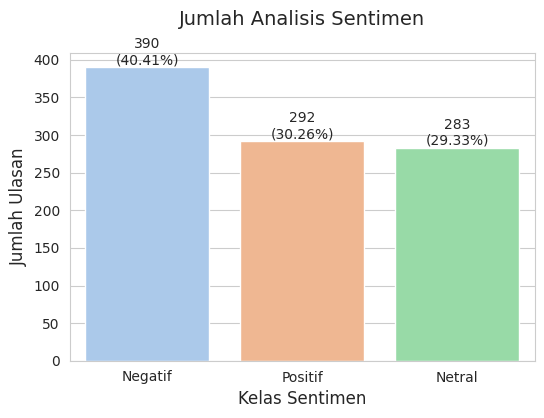

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sentiment_count = data['sentiment'].value_counts()
sns.set_style('whitegrid')

fig, ax = plt.subplots(figsize=(6, 4))
ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')
plt.title('Jumlah Analisis Sentimen', fontsize=14, pad=20)
plt.xlabel('Kelas Sentimen', fontsize=12)
plt.ylabel('Jumlah Ulasan', fontsize=12)

total = len(data['sentiment'])

for i, count in enumerate(sentiment_count.values):
    percentage = f'{100 * count / total:.2f}%'
    ax.text(i, count + 0.10, f'{count}\n({percentage})', ha= 'center', va= 'bottom')
plt.show()

In [ ]:
data.to_csv('Hasil_labeling_data_disney.csv',encoding='utf8', index=False)

In [ ]:
#ekspor ke file CSV terpisah berdasarkan label sentimen
for sentiment_label in ['Positif', 'Negatif', 'Netral']:
  #filter data sesuai dengan label sentimen
  filtered_data = data[data['sentiment'] == sentiment_label]

  #tentukan nama file berdasarkan label sentimen
  filename = f"{sentiment_label}_dataset.csv"

  #ekspor data yang telah difilter ke file CSV
  filtered_data.to_csv(filename, index=False)

# SPLITTING DATASET

In [ ]:
import pandas as pd

data = pd.read_csv("Hasil_labeling_data_disney.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 965 entries, 0 to 964
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   userName      965 non-null    object
 1   score         965 non-null    int64 
 2   at            965 non-null    object
 3   content       965 non-null    object
 4   steming_data  965 non-null    object
 5   rating        965 non-null    int64 
 6   sentiment     965 non-null    object
dtypes: int64(2), object(5)
memory usage: 52.9+ KB


In [ ]:
df = data.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 965 entries, 0 to 964
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   userName      965 non-null    object
 1   score         965 non-null    int64 
 2   at            965 non-null    object
 3   content       965 non-null    object
 4   steming_data  965 non-null    object
 5   rating        965 non-null    int64 
 6   sentiment     965 non-null    object
dtypes: int64(2), object(5)
memory usage: 52.9+ KB


In [ ]:
print(df.columns)

Index(['userName', 'score', 'at', 'content', 'steming_data', 'rating',
       'sentiment'],
      dtype='object')


In [ ]:
from sklearn.model_selection import train_test_split

# Bagi data menjadi data pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(df['steming_data'],df['sentiment'], test_size=0.2, random_state=42)

In [ ]:
#simpan data latih ke file
train_set = pd.DataFrame({'text': X_train, 'sentiment': y_train})
train_set.to_csv('train_data_disney.csv', index=False)

In [ ]:
#simpan data uji ke file
test_set = pd.DataFrame({'text': X_test, 'sentiment': y_test})
test_set.to_csv('test_data_disney.csv', index=False)

In [ ]:
#menampilkan informasi jumlah kata
print(f'Jumlah Data Latih: {len(X_train)}')
print(f'Jumlah Data Uji: {len(X_test)}')

Jumlah Data Latih: 772
Jumlah Data Uji: 193


**buka hasil di code cell output action/view output fullscreen**

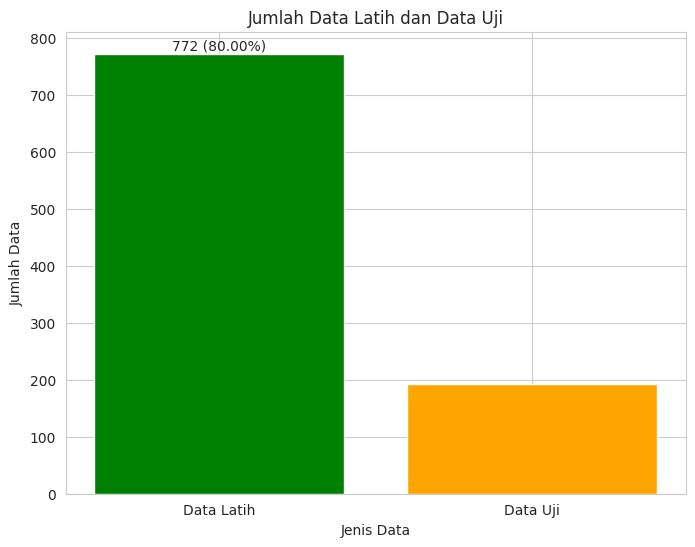

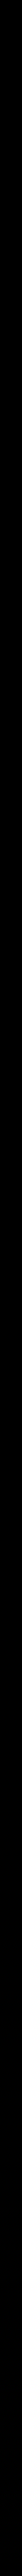

In [ ]:
import matplotlib.pyplot as plt

#jumlah data latih dan data uji
train_size = len(X_train)
test_size = len(X_test)

#membuat plot
plt.figure(figsize=(8, 6))
bars = plt.bar(['Data Latih', 'Data Uji'], [train_size, test_size], color=['green', 'orange'])

#menambahkan label untuk setiap bar (dalam kurung persentase)
for bar in bars:
  height = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, height + 0.7, f'{height} ({height / (train_size + test_size) * 100:.2f}%)', ha='center', va='bottom')

  plt.title('Jumlah Data Latih dan Data Uji')
  plt.xlabel('Jenis Data')
  plt.ylabel('Jumlah Data')
  plt.show()

# NAIVE BAYES CLASSIFIER

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 965 entries, 0 to 964
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   userName      965 non-null    object
 1   score         965 non-null    int64 
 2   at            965 non-null    object
 3   content       965 non-null    object
 4   steming_data  965 non-null    object
 5   rating        965 non-null    int64 
 6   sentiment     965 non-null    object
dtypes: int64(2), object(5)
memory usage: 52.9+ KB


In [ ]:
df.head()

,userName,score,at,content,steming_data,rating,sentiment
0,Rizqi Gunawan,3,2025-06-19 02:39:39,tiba tiba layar hitam Mulu aneh,layar hitam mulu aneh,-1,Negatif
1,Vicky hardiansah,1,2025-06-19 01:44:42,"udah langganan, suara doang yg keluar, ga ada ...",langgan suara doang gambar payah banget nama m...,3,Positif
2,Claud Mendung,5,2025-06-18 22:21:57,Menurutku oke banget karena pilihan film nya l...,turut oke banget pilih film ya variatif series...,2,Positif
3,Ismail Cell,1,2025-06-18 16:53:53,males saya untok nonton video kartun suruh bay...,malas untok tonton video kartun suruh bayar ma...,-4,Negatif
4,Mulki Only,1,2025-06-18 14:16:34,di hp infinix zero 30 ga muncul gambarnya hany...,hp infinix zero muncul gambar suara perangkat ...,-2,Negatif


TRANSFORMASI TEKS MENJADI MATRIKS FREKUENSI TOKEN MENGHITUNG PROBABILITAS PRIOR (p(c)P(C))

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

#inisialisasi CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['steming_data'])
features = vectorizer.get_feature_names_out()
df_tokens = pd.DataFrame(X.toarray(), columns=features)
df_combined = pd.concat([df_tokens, df['sentiment']], axis=1)

#menghitung frekuensi token untuk setiap sentimen
frequency_positive = df_combined[df_combined['sentiment'] == 'Positif'].drop('sentiment', axis=1).sum()
frequency_negative = df_combined[df_combined['sentiment'] == 'Negatif'].drop('sentiment', axis=1).sum()
frequency_neutral = df_combined[df_combined['sentiment'] == 'Netral'].drop('sentiment', axis=1).sum()

#menghitung probabilitas prior
sentiment_counts = df['sentiment'].value_counts()
total_samples = len(df)
prior_probabilities = sentiment_counts / total_samples

print("Prior Probabilities:")
print(prior_probabilities)

Prior Probabilities:
sentiment
Negatif    0.404145
Positif    0.302591
Netral     0.293264
Name: count, dtype: float64


MWNGHITUNG PROBABILITAS KONDISIONAL (p(wi|C)P(WI|C))

In [ ]:
# menghitung probabilitas kondisional untuk setiap token dan sentimen dengan smooting Laplace

total_positive = frequency_positive.sum()
total_negative = frequency_negative.sum()
total_neutral = frequency_neutral.sum()
probability_conditional_positive = (frequency_positive + 1) / (total_positive + len(features))
probability_conditional_negative = (frequency_negative + 1) / (total_negative + len(features))
probability_conditional_neutral = (frequency_neutral + 1) / (total_neutral + len(features))

print("Probability Conditional Positive:")
print(probability_conditional_positive)
print("\nProbability Conditional Negative:")
print(probability_conditional_negative)
print("\nProbability Conditional Neutral:")
print(probability_conditional_neutral)

Probability Conditional Positive:
abad       0.000457
abang      0.000457
acara      0.000229
account    0.000229
acuih      0.000229
             ...   
ytub       0.000229
zero       0.000229
zonk       0.000686
zonkkk     0.000229
zzz        0.000457
Length: 1705, dtype: float64

Probability Conditional Negative:
abad       0.000192
abang      0.000384
acara      0.000384
account    0.000575
acuih      0.000192
             ...   
ytub       0.000384
zero       0.000384
zonk       0.000192
zonkkk     0.000384
zzz        0.000192
Length: 1705, dtype: float64

Probability Conditional Neutral:
abad       0.000305
abang      0.000305
acara      0.000305
account    0.000610
acuih      0.000610
             ...   
ytub       0.000305
zero       0.000305
zonk       0.000610
zonkkk     0.000305
zzz        0.000305
Length: 1705, dtype: float64


MENGHITUNG PROBABILITAS POSTERIOR (p(c|w)P(C|W)) UNTUK SETIAP DOKUMEN

In [ ]:
#menghitung probabilitas posterior untuk setiap dokumen
def calculate_posterior_probabilities(document):
  words = document.split()
  posterior_positive = prior_probabilities['Positif']
  posterior_negative = prior_probabilities['Negatif']
  posterior_neutral = prior_probabilities['Netral']

  for word in words:
    if word in features:
      posterior_positive *= probability_conditional_positive[word]
      posterior_negative *= probability_conditional_negative[word]
      posterior_neutral *= probability_conditional_neutral[word]
      return {'Positif': posterior_positive, 'Negatif': posterior_negative, 'Netral': posterior_neutral}

df['posterior_probabilities'] = df['steming_data'].apply(calculate_posterior_probabilities)
df.head()

,userName,score,at,content,steming_data,rating,sentiment,posterior_probabilities
0,Rizqi Gunawan,3,2025-06-19 02:39:39,tiba tiba layar hitam Mulu aneh,layar hitam mulu aneh,-1,Negatif,"{'Positif': 0.0006917939496459295, 'Negatif': ..."
1,Vicky hardiansah,1,2025-06-19 01:44:42,"udah langganan, suara doang yg keluar, ga ada ...",langgan suara doang gambar payah banget nama m...,3,Positif,"{'Positif': 0.009754294690007603, 'Negatif': 0..."
2,Claud Mendung,5,2025-06-18 22:21:57,Menurutku oke banget karena pilihan film nya l...,turut oke banget pilih film ya variatif series...,2,Positif,"{'Positif': 0.00013835878992918588, 'Negatif':..."
3,Ismail Cell,1,2025-06-18 16:53:53,males saya untok nonton video kartun suruh bay...,malas untok tonton video kartun suruh bayar ma...,-4,Negatif,"{'Positif': 6.917939496459294e-05, 'Negatif': ..."
4,Mulki Only,1,2025-06-18 14:16:34,di hp infinix zero 30 ga muncul gambarnya hany...,hp infinix zero muncul gambar suara perangkat ...,-2,Negatif,"{'Positif': 0.001521946689221045, 'Negatif': 0..."


# NAIVE BAYES GAUSSIAN

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 965 entries, 0 to 964
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   userName                 965 non-null    object
 1   score                    965 non-null    int64 
 2   at                       965 non-null    object
 3   content                  965 non-null    object
 4   steming_data             965 non-null    object
 5   rating                   965 non-null    int64 
 6   sentiment                965 non-null    object
 7   posterior_probabilities  965 non-null    object
dtypes: int64(2), object(6)
memory usage: 60.4+ KB


In [ ]:
df.head()

,userName,score,at,content,steming_data,rating,sentiment,posterior_probabilities
0,Rizqi Gunawan,3,2025-06-19 02:39:39,tiba tiba layar hitam Mulu aneh,layar hitam mulu aneh,-1,Negatif,"{'Positif': 0.0006917939496459295, 'Negatif': ..."
1,Vicky hardiansah,1,2025-06-19 01:44:42,"udah langganan, suara doang yg keluar, ga ada ...",langgan suara doang gambar payah banget nama m...,3,Positif,"{'Positif': 0.009754294690007603, 'Negatif': 0..."
2,Claud Mendung,5,2025-06-18 22:21:57,Menurutku oke banget karena pilihan film nya l...,turut oke banget pilih film ya variatif series...,2,Positif,"{'Positif': 0.00013835878992918588, 'Negatif':..."
3,Ismail Cell,1,2025-06-18 16:53:53,males saya untok nonton video kartun suruh bay...,malas untok tonton video kartun suruh bayar ma...,-4,Negatif,"{'Positif': 6.917939496459294e-05, 'Negatif': ..."
4,Mulki Only,1,2025-06-18 14:16:34,di hp infinix zero 30 ga muncul gambarnya hany...,hp infinix zero muncul gambar suara perangkat ...,-2,Negatif,"{'Positif': 0.001521946689221045, 'Negatif': 0..."


GaussianNB Results
Confusion Matrix (GaussianNB):
[[24 35 14]
 [12 33 17]
 [12 19 27]]

Classification Report (GaussianNB):
              precision    recall  f1-score   support

     Negatif       0.50      0.33      0.40        73
      Netral       0.38      0.53      0.44        62
     Positif       0.47      0.47      0.47        58

    accuracy                           0.44       193
   macro avg       0.45      0.44      0.44       193
weighted avg       0.45      0.44      0.43       193


Accuracy Score (GaussianNB):
Accuracy (GaussianNB): 0.4352


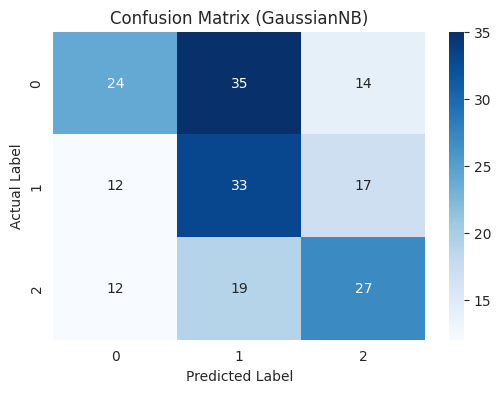

Actual Label vs Predicted Label (GaussianNB):


,steming_data,Actual Label,Predicted Label
889,apk ya dah gniat,Netral,Negatif
468,film ya jelek jelek,Negatif,Netral
168,langgan isi data ribet malas kata isi data apl...,Negatif,Positif
405,langgan bari pakai aplikasi boaa suara gambar ...,Negatif,Netral
70,audio bahasa indonesiahanya pilih profil dewas...,Negatif,Positif


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
import matplotlib.pyplot as plt

#preprocessing data
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['steming_data']).toarray()
y = df['sentiment']

#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#initialize and train model GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

#predict with GaussianNB
y_pred_gnb = gnb.predict(X_test)

#evaluate GaussianNB
conf_matrix_gnb = confusion_matrix(y_test, y_pred_gnb)
class_report_gnb = classification_report(y_test, y_pred_gnb)
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)

print("GaussianNB Results")
print("===================")
print("Confusion Matrix (GaussianNB):")
print(conf_matrix_gnb)
print("===================================")
print("\nClassification Report (GaussianNB):")
print(class_report_gnb)
print("===================================")
print("\nAccuracy Score (GaussianNB):")
print(f"Accuracy (GaussianNB): {accuracy_gnb:.4f}")
print("===================================")

#plot confusion matrix for GaussianNB
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_gnb, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (GaussianNB)')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

#create DataFrame for actual vs predicted (GaussianNB)
results_gnb = pd.DataFrame({'steming_data': df.loc[y_test.index, 'steming_data'], 'Actual Label': y_test, 'Predicted Label': y_pred_gnb})
results_gnb.to_csv('Hasil_prediksi_GaussianNB_disney.csv',encoding='utf8', index=False)
print("Actual Label vs Predicted Label (GaussianNB):")
results_gnb.head()

# NAIVE BAYES MULTINOMIAL

MultinomialNB Results
Confusion Matrix (MultinomialNB):
[[71  0  2]
 [47 11  4]
 [23  3 32]]

Classification Report (MultinomialNB):
              precision    recall  f1-score   support

     Negatif       0.50      0.97      0.66        73
      Netral       0.79      0.18      0.29        62
     Positif       0.84      0.55      0.67        58

    accuracy                           0.59       193
   macro avg       0.71      0.57      0.54       193
weighted avg       0.70      0.59      0.54       193


Accuracy Score (MultinomialNB):
Accuracy (MultinomialNB): 0.5907


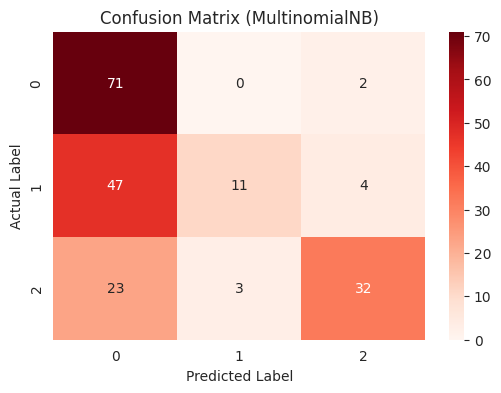

Actual Label vs Predicted Label (MultinomialNB):


,steming_data,Actual Label,Predicted Label
889,apk ya dah gniat,Netral,Negatif
468,film ya jelek jelek,Negatif,Negatif
168,langgan isi data ribet malas kata isi data apl...,Negatif,Negatif
405,langgan bari pakai aplikasi boaa suara gambar ...,Negatif,Negatif
70,audio bahasa indonesiahanya pilih profil dewas...,Negatif,Negatif


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
import matplotlib.pyplot as plt

#preprocessing data
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['steming_data']).toarray()
y = df['sentiment']

#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#initialize and train model GaussianNB
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

#predict with GaussianNB
y_pred_mnb = mnb.predict(X_test)

#evaluate MultinomialNB
conf_matrix_mnb = confusion_matrix(y_test, y_pred_mnb)
class_report_mnb = classification_report(y_test, y_pred_mnb)
accuracy_mnb = accuracy_score(y_test, y_pred_mnb)

print("MultinomialNB Results")
print("===================")
print("Confusion Matrix (MultinomialNB):")
print(conf_matrix_mnb)
print("===================================")
print("\nClassification Report (MultinomialNB):")
print(class_report_mnb)
print("===================================")
print("\nAccuracy Score (MultinomialNB):")
print(f"Accuracy (MultinomialNB): {accuracy_mnb:.4f}")
print("===================================")

#plot confusion matrix for MultinomialNB
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_mnb, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix (MultinomialNB)')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

#create DataFrame for actual vs predicted (MultinomialNB)
results_mnb = pd.DataFrame({'steming_data': df.loc[y_test.index, 'steming_data'], 'Actual Label': y_test, 'Predicted Label': y_pred_mnb})
results_mnb.to_csv('Hasil_prediksi_MultinomialNB_disney.csv',encoding='utf8', index=False)
print("Actual Label vs Predicted Label (MultinomialNB):")
results_mnb.head()

# NAIVE BAYES BERNOULLI

BernoulliNB Results
Confusion Matrix (BernoulliNB):
[[61 10  2]
 [27 33  2]
 [15 25 18]]

Classification Report (BernoulliNB):
              precision    recall  f1-score   support

     Negatif       0.59      0.84      0.69        73
      Netral       0.49      0.53      0.51        62
     Positif       0.82      0.31      0.45        58

    accuracy                           0.58       193
   macro avg       0.63      0.56      0.55       193
weighted avg       0.63      0.58      0.56       193


Accuracy Score (BernoulliNB):
Accuracy (BernoulliNB): 0.5803


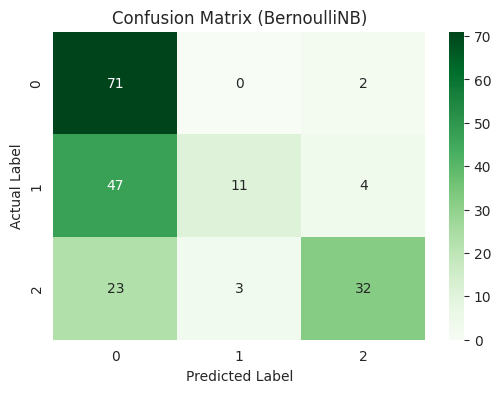

Actual Label vs Predicted Label (BernoulliNB):


,steming_data,Actual Label,Predicted Label
889,apk ya dah gniat,Netral,Netral
468,film ya jelek jelek,Negatif,Negatif
168,langgan isi data ribet malas kata isi data apl...,Negatif,Negatif
405,langgan bari pakai aplikasi boaa suara gambar ...,Negatif,Negatif
70,audio bahasa indonesiahanya pilih profil dewas...,Negatif,Positif


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
import matplotlib.pyplot as plt

#preprocessing data
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['steming_data']).toarray()
y = df['sentiment']

#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#initialize and train model BernoulliNB
bnb = BernoulliNB()
bnb.fit(X_train, y_train)

#predict with BernoulliNB
y_pred_bnb = bnb.predict(X_test)

#evaluate BernoulliNB
conf_matrix_bnb = confusion_matrix(y_test, y_pred_bnb)
class_report_bnb = classification_report(y_test, y_pred_bnb)
accuracy_bnb = accuracy_score(y_test, y_pred_bnb)

print("BernoulliNB Results")
print("===================")
print("Confusion Matrix (BernoulliNB):")
print(conf_matrix_bnb)
print("===================================")
print("\nClassification Report (BernoulliNB):")
print(class_report_bnb)
print("===================================")
print("\nAccuracy Score (BernoulliNB):")
print(f"Accuracy (BernoulliNB): {accuracy_bnb:.4f}")
print("===================================")

#plot confusion matrix for BernoulliNB
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_mnb, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix (BernoulliNB)')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

#create DataFrame for actual vs predicted (BernoulliNB)
results_bnb = pd.DataFrame({'steming_data': df.loc[y_test.index, 'steming_data'], 'Actual Label': y_test, 'Predicted Label': y_pred_bnb})
results_bnb.to_csv('Hasil_prediksi_BernoulliNB_disney.csv',encoding='utf8', index=False)
print("Actual Label vs Predicted Label (BernoulliNB):")
results_bnb.head()

# WORDCLOUD

In [ ]:
import pandas as pd

data = pd.read_csv("Hasil_labeling_data_disney.csv")
data.head()

,userName,score,at,content,steming_data,rating,sentiment
0,Rizqi Gunawan,3,2025-06-19 02:39:39,tiba tiba layar hitam Mulu aneh,layar hitam mulu aneh,-1,Negatif
1,Vicky hardiansah,1,2025-06-19 01:44:42,"udah langganan, suara doang yg keluar, ga ada ...",langgan suara doang gambar payah banget nama m...,3,Positif
2,Claud Mendung,5,2025-06-18 22:21:57,Menurutku oke banget karena pilihan film nya l...,turut oke banget pilih film ya variatif series...,2,Positif
3,Ismail Cell,1,2025-06-18 16:53:53,males saya untok nonton video kartun suruh bay...,malas untok tonton video kartun suruh bayar ma...,-4,Negatif
4,Mulki Only,1,2025-06-18 14:16:34,di hp infinix zero 30 ga muncul gambarnya hany...,hp infinix zero muncul gambar suara perangkat ...,-2,Negatif


In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#pisahkan dataset berdasarkan sentimen
sentimen_negatif = data[data['sentiment'] == 'Negatif']['steming_data'].str.cat(sep=' ')
sentimen_positif = data[data['sentiment'] == 'Positif']['steming_data'].str.cat(sep=' ')
sentimen_netral = data[data['sentiment'] == 'Netral']['steming_data'].str.cat(sep=' ')

#fungsi untuk membuat dan menampilkan WordCloud
def create_wordcloud(text, tittle):
  wordcloud = WordCloud(width=800, height=400, random_state=42, max_font_size=100, background_color='black').generate(text)

  plt.figure(figsize=(10, 5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.title(tittle, fontsize=16)
  plt.axis('off')
  plt.show()

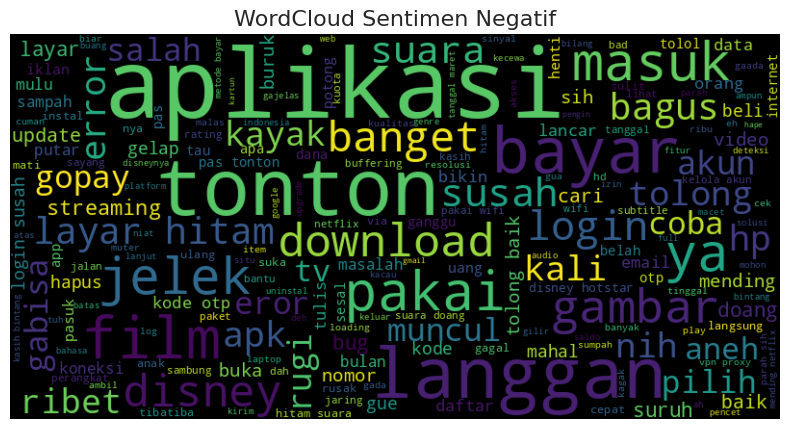

In [ ]:
#membuat WordCloud untuk sentimen negatif
create_wordcloud(sentimen_negatif, 'WordCloud Sentimen Negatif')

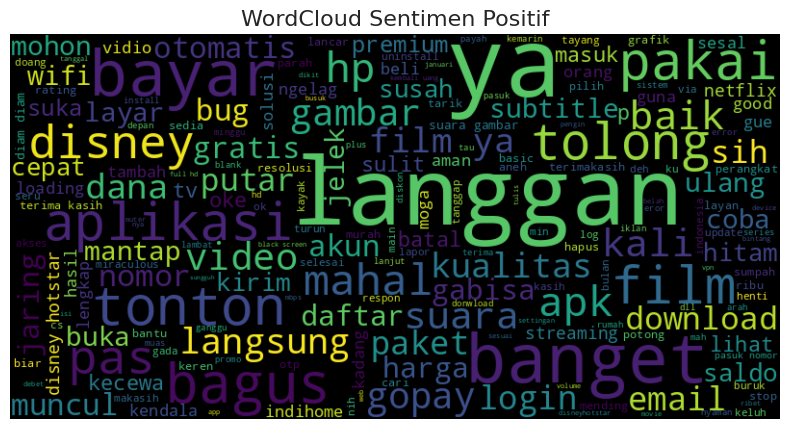

In [ ]:
#membuat WordCloud untuk sentimen positif
create_wordcloud(sentimen_positif, 'WordCloud Sentimen Positif')

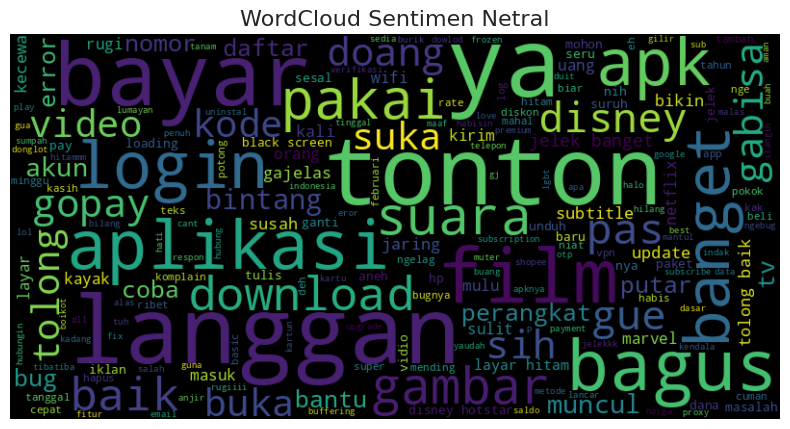

In [ ]:
#membuat WordCloud untuk sentimen netral
create_wordcloud(sentimen_netral, 'WordCloud Sentimen Netral')

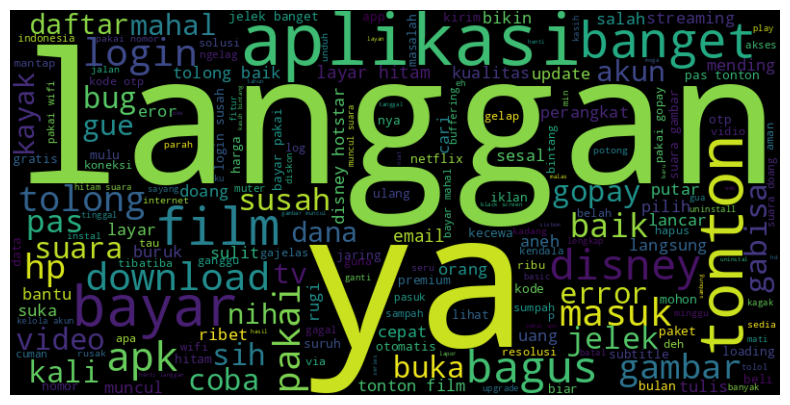

In [ ]:
#menggabungkan teks dalam kolom 'translated_steming_data' menjadi satu string
text = ' '.join(data['steming_data'].apply(lambda x: str(x) if isinstance(x, (str, int, float)) else ''))

wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

RATING

In [ ]:
import pandas as pd
data = pd.read_csv("Hasil_labeling_data_disney.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 965 entries, 0 to 964
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   userName      965 non-null    object
 1   score         965 non-null    int64 
 2   at            965 non-null    object
 3   content       965 non-null    object
 4   steming_data  965 non-null    object
 5   rating        965 non-null    int64 
 6   sentiment     965 non-null    object
dtypes: int64(2), object(5)
memory usage: 52.9+ KB


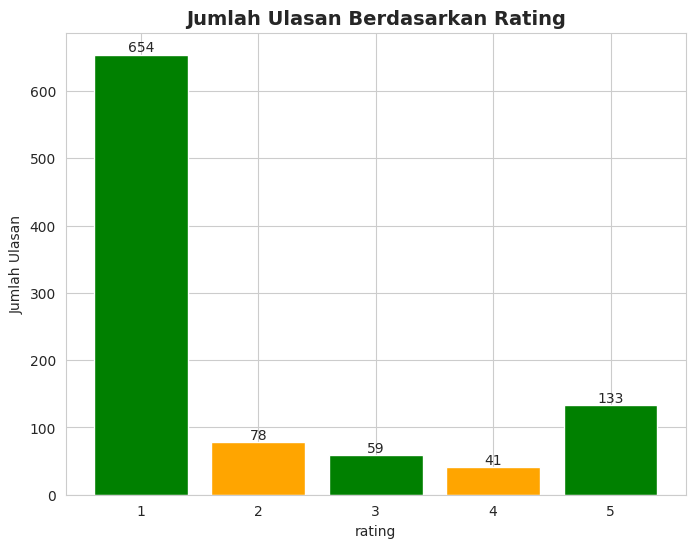

In [ ]:
import matplotlib.pyplot as plt

rating_counts = data['score'].value_counts()
rating_counts = rating_counts.sort_index()

colors = ['green','orange','green','orange','green']

plt.figure(figsize=(8, 6))
bars = plt.bar(rating_counts.index, rating_counts.values, color=colors)
plt.title('Jumlah Ulasan Berdasarkan Rating', fontsize=14, fontweight='bold')
plt.xlabel('rating')
plt.ylabel('Jumlah Ulasan')
plt.xticks(rating_counts.index)

for bar in bars:
   height = bar.get_height()
   plt.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')

plt.show()